Phân tích đại học bách khoa hà nội 



In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from facebook_scraper import get_profile

In [77]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/bkhn.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        122 non-null    int64  
 1   text                           122 non-null    object 
 2   post_text                      119 non-null    object 
 3   shared_text                    22 non-null     object 
 4   original_text                  3 non-null      object 
 5   time                           122 non-null    object 
 6   timestamp                      112 non-null    float64
 7   image                          74 non-null     object 
 8   image_lowquality               120 non-null    object 
 9   images                         122 non-null    object 
 10  images_description             122 non-null    object 
 11  images_lowquality              122 non-null    object 
 12  images_lowquality_description  122 non-null    obj

CLEANING DATA

In [78]:
used_data = raw_df[['post_id','post_text','text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
used_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,707107024876484,Mở đầu hoạt động đánh giá cấp Đại học ngày 27-...,Mở đầu hoạt động đánh giá cấp Đại học ngày 27-...,2023-11-27 12:57:15,"[""May be an image of 11 people and text that s...",1,10,[],[],"{'like': 170, 'love': 24, 'wow': 1}",195
1,707051494882037,[Người Bách Khoa]\n\nHÀNH TRÌNH TRỞ THÀNH GIÁO...,[Người Bách Khoa]\n\nHÀNH TRÌNH TRỞ THÀNH GIÁO...,2023-11-27 09:54:21,[],21,12,"[{'comment_id': '275141581721789', 'comment_ur...",[],"{'like': 372, 'love': 87, 'wow': 1, 'care': 1}",461
2,705596105027576,Học bổng 140 triệu đồng/ 2 năm bao gồm: Chi ph...,Học bổng 140 triệu đồng/ 2 năm bao gồm: Chi ph...,2023-11-24 11:16:21,['May be a graphic of text'],13,25,"[{'comment_id': '648875677410287', 'comment_ur...","[{'name': 'Lan Ngô', 'link': 'https://facebook...","{'like': 341, 'love': 41, 'haha': 1, 'wow': 6,...",392
3,705056435081543,💎 CÔNG BỐ KẾT QUẢ CUỘC THI “ĐỂ BÁCH KHOA KỂ BẠ...,💎 CÔNG BỐ KẾT QUẢ CUỘC THI “ĐỂ BÁCH KHOA KỂ BẠ...,2023-11-23 09:18:04,[],15,17,"[{'comment_id': '6864027373692483', 'comment_u...","[{'name': 'LớpE Trần Phú', 'link': 'https://fa...","{'like': 403, 'love': 102, 'haha': 2, 'wow': 1...",514
4,704694735117713,🎯 ĐẠI HỌC BÁCH KHOA HÀ NỘI CHUẨN BỊ KIỂM ĐỊNH ...,🎯 ĐẠI HỌC BÁCH KHOA HÀ NỘI CHUẨN BỊ KIỂM ĐỊNH ...,2023-11-22 18:13:26,[],3,6,[],"[{'name': 'Hoài Trương', 'link': 'https://face...","{'like': 132, 'love': 21, 'haha': 2, 'care': 1...",157
...,...,...,...,...,...,...,...,...,...,...,...
117,670236568563530,TRƯỜNG HÈ SOICT 2023: ĐÓNG GÓP CHO SỰ PHÁT TRI...,TRƯỜNG HÈ SOICT 2023: ĐÓNG GÓP CHO SỰ PHÁT TRI...,2023-09-19 21:20:05,['May be an image of 4 people and people study...,0,2,[],"[{'name': 'Đặng Cường', 'link': 'https://faceb...","{'like': 63, 'love': 14}",77
118,670069805246873,"15 suất học bổng, trị giá ~15 tr VNĐ/suất dành...","15 suất học bổng, trị giá ~15 tr VNĐ/suất dành...",2023-09-19 14:45:28,[],26,10,"[{'comment_id': '1796941780723021', 'comment_u...","[{'name': 'Nguyễn Việt Hùng', 'link': 'https:/...","{'like': 653, 'love': 58, 'haha': 3, 'wow': 3,...",719
119,669994385254415,Công đoàn Đại học Bách khoa Hà Nội tổ chức Hội...,Công đoàn Đại học Bách khoa Hà Nội tổ chức Hội...,2023-09-19 11:11:48,"[""May be an image of map and text that says 'B...",4,11,"[{'comment_id': '3428872274017901', 'comment_u...","[{'name': 'Ryan Không Sai Lừm', 'link': 'https...","{'like': 108, 'love': 22, 'wow': 1, 'care': 1,...",133
120,669985388588648,"Năm 2020, Đại học Bách khoa Hà Nội mở đào tạo ...","Năm 2020, Đại học Bách khoa Hà Nội mở đào tạo ...",2023-09-19 10:45:29,[],1,2,[],"[{'name': 'Lương Thủy', 'link': 'https://faceb...","{'like': 383, 'love': 36, 'haha': 1}",420


In [79]:
cleaned_data = used_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}",
                                "post_text" : "No post text"})
def replace_empty_string(value):
    return value if ((isinstance(value, str)) and (value != '[]')) else 'No photo description available'
def replace_empty_comment(cm):
    return cm if ((isinstance(cm, str)) and (cm != '[]')) else 'No comment available'
def replace_empty_reactors(r):
    if (len(str(r)) > 4):
        return r
    else: 
        return 'No reactors available'
def reset_reaction_count(rc):
    for i in range(len(rc)):
        if cleaned_data['reactions'][i] == "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}":
             cleaned_data.loc[i, 'reaction_count'] = 0
cleaned_data["images_description"] = cleaned_data["images_description"].apply(replace_empty_string)
cleaned_data["comments_full"] = cleaned_data["comments_full"].apply(replace_empty_comment)
cleaned_data["reactors"] = cleaned_data["reactors"].apply(replace_empty_reactors)
reset_reaction_count(cleaned_data)
cleaned_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,707107024876484,Mở đầu hoạt động đánh giá cấp Đại học ngày 27-...,Mở đầu hoạt động đánh giá cấp Đại học ngày 27-...,2023-11-27 12:57:15,"[""May be an image of 11 people and text that s...",1,10,No comment available,No reactors available,"{'like': 170, 'love': 24, 'wow': 1}",195
1,707051494882037,[Người Bách Khoa]\n\nHÀNH TRÌNH TRỞ THÀNH GIÁO...,[Người Bách Khoa]\n\nHÀNH TRÌNH TRỞ THÀNH GIÁO...,2023-11-27 09:54:21,No photo description available,21,12,"[{'comment_id': '275141581721789', 'comment_ur...",No reactors available,"{'like': 372, 'love': 87, 'wow': 1, 'care': 1}",461
2,705596105027576,Học bổng 140 triệu đồng/ 2 năm bao gồm: Chi ph...,Học bổng 140 triệu đồng/ 2 năm bao gồm: Chi ph...,2023-11-24 11:16:21,['May be a graphic of text'],13,25,"[{'comment_id': '648875677410287', 'comment_ur...","[{'name': 'Lan Ngô', 'link': 'https://facebook...","{'like': 341, 'love': 41, 'haha': 1, 'wow': 6,...",392
3,705056435081543,💎 CÔNG BỐ KẾT QUẢ CUỘC THI “ĐỂ BÁCH KHOA KỂ BẠ...,💎 CÔNG BỐ KẾT QUẢ CUỘC THI “ĐỂ BÁCH KHOA KỂ BẠ...,2023-11-23 09:18:04,No photo description available,15,17,"[{'comment_id': '6864027373692483', 'comment_u...","[{'name': 'LớpE Trần Phú', 'link': 'https://fa...","{'like': 403, 'love': 102, 'haha': 2, 'wow': 1...",514
4,704694735117713,🎯 ĐẠI HỌC BÁCH KHOA HÀ NỘI CHUẨN BỊ KIỂM ĐỊNH ...,🎯 ĐẠI HỌC BÁCH KHOA HÀ NỘI CHUẨN BỊ KIỂM ĐỊNH ...,2023-11-22 18:13:26,No photo description available,3,6,No comment available,"[{'name': 'Hoài Trương', 'link': 'https://face...","{'like': 132, 'love': 21, 'haha': 2, 'care': 1...",157
...,...,...,...,...,...,...,...,...,...,...,...
117,670236568563530,TRƯỜNG HÈ SOICT 2023: ĐÓNG GÓP CHO SỰ PHÁT TRI...,TRƯỜNG HÈ SOICT 2023: ĐÓNG GÓP CHO SỰ PHÁT TRI...,2023-09-19 21:20:05,['May be an image of 4 people and people study...,0,2,No comment available,"[{'name': 'Đặng Cường', 'link': 'https://faceb...","{'like': 63, 'love': 14}",77
118,670069805246873,"15 suất học bổng, trị giá ~15 tr VNĐ/suất dành...","15 suất học bổng, trị giá ~15 tr VNĐ/suất dành...",2023-09-19 14:45:28,No photo description available,26,10,"[{'comment_id': '1796941780723021', 'comment_u...","[{'name': 'Nguyễn Việt Hùng', 'link': 'https:/...","{'like': 653, 'love': 58, 'haha': 3, 'wow': 3,...",719
119,669994385254415,Công đoàn Đại học Bách khoa Hà Nội tổ chức Hội...,Công đoàn Đại học Bách khoa Hà Nội tổ chức Hội...,2023-09-19 11:11:48,"[""May be an image of map and text that says 'B...",4,11,"[{'comment_id': '3428872274017901', 'comment_u...","[{'name': 'Ryan Không Sai Lừm', 'link': 'https...","{'like': 108, 'love': 22, 'wow': 1, 'care': 1,...",133
120,669985388588648,"Năm 2020, Đại học Bách khoa Hà Nội mở đào tạo ...","Năm 2020, Đại học Bách khoa Hà Nội mở đào tạo ...",2023-09-19 10:45:29,No photo description available,1,2,No comment available,"[{'name': 'Lương Thủy', 'link': 'https://faceb...","{'like': 383, 'love': 36, 'haha': 1}",420


In [80]:
input_string = cleaned_data.iloc[1].comments_full
s = input_string.split(",")
s

["[{'comment_id': '275141581721789'",
 " 'comment_url': 'https://facebook.com/275141581721789'",
 " 'commenter_id': '100004329600384'",
 " 'commenter_url': 'https://facebook.com/minhhieu.pham.3158?eav=Afa4aErNH8WLjFAKjb3VRavUdNsJj0q495ZJR6RlmOVrE3fOvOtebIAxL2Zx8nw2sNQ&fref=nf&rc=p&refid=52&__tn__=R&paipv=0'",
 " 'commenter_name': 'Pham Minh Hieu'",
 " 'commenter_meta': None",
 " 'comment_text': 'Nguyễn Tiến Hồng bạn t =))'",
 " 'comment_time': datetime.datetime(2023",
 ' 11',
 ' 26',
 ' 0',
 ' 0)',
 " 'comment_image': None",
 " 'comment_reactors': []",
 " 'comment_reactions': None",
 " 'comment_reaction_count': None",
 " 'replies': [{'comment_id': '317250811215378'",
 " 'comment_url': 'https://facebook.com/317250811215378'",
 " 'commenter_id': '100002852970646'",
 " 'commenter_url': 'https://facebook.com/cuong.nn218?eav=AfZ6o2BEUKZUJpQzjutUb69ExqZlqpOrow0JIY7K1yDhahFp9Hq8eRtLD9UKfRhWN8U&fref=nf&rc=p&__tn__=R&paipv=0'",
 " 'commenter_name': 'Cuong Ngoc Nguyen'",
 " 'commenter_meta': Non

In [81]:
# Chuỗi đầu vào
'''
commenter_name
commenter_id
comment_text
'''
import re
input_string = cleaned_data.iloc[1].comments_full
s = input_string.split(",")
commenter_name = []
commenter_id = []
comment_text = []
for i in s:
    data_string = i
    match_commenter_id = re.search(r"'commenter_id': '(\d+)'", data_string)
    match_commenter_name = re.search(r"'commenter_name': '([^']+)'", data_string)
    match_comment_text = re.search(r"'comment_text': '([^']+)'", data_string)
    if match_commenter_id:
        id = match_commenter_id.group(1)
        commenter_id.append(id)
    elif match_commenter_name:
        name = match_commenter_name.group(1)
        commenter_name.append(name)   
    elif match_comment_text:
        text = match_comment_text.group(1)
        comment_text.append(text)   

commenter_id

['100004329600384',
 '100002852970646',
 '100004329600384',
 '100013136588921',
 '100008481336643',
 '100012928714851',
 '100006555794200',
 '100028600280553',
 '100035869522698',
 '100024167191873',
 '100004051719818',
 '100023648121843']

In [83]:
profiles = []
for i in range (len(commenter_id)):
    print(i)
    get_profile(str(commenter_id[i]))
    

0


/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/facebook_scraper.py:912: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


LoginRequired: A login (cookies) is required to see this page

Bài viết có lượt tương tác cao nhất 

Prepare data

In [ ]:
month = []
hour = []
days = []
Date = []
Time = []
for i in range(len(cleaned_data)):
    t = cleaned_data['time'][i].split(" ")
    p_time = t[1].split(":")
    p_date = t[0].split("-")
    Time.append(t[1])
    Date.append(t[0])
    month.append(int(p_date[1]))
    hour.append(int(p_time[0]))
    days.append(p_date[2])
cleaned_data['Day'] = days
cleaned_data['Month'] = month
cleaned_data['Date'] = Date
cleaned_data['Time'] = Time
cleaned_data['Hour'] = hour   

In [ ]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(cleaned_data)):
     if ((cleaned_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(cleaned_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)

In [ ]:
cleaned_data['Thích'] = thich
cleaned_data['Yêu_thích'] = yeu_thich
cleaned_data['Haha'] = haha
cleaned_data['Wow'] = wow
cleaned_data['Thương_thương'] = thuong_thuong
cleaned_data['Buồn'] = buon
cleaned_data['Phẫn_nộ'] = phan_no

In [ ]:
sorted_data = cleaned_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
56,687750586812128,"Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...","Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...",2023-10-21 10:56:23,No photo description available,6200,8400,"[{'comment_id': '641092281526904', 'comment_ur...","[{'name': 'Nguyễn Huyên', 'link': 'https://fac...","{'like': 80468, 'love': 16150, 'haha': 14, 'wo...",...,2023-10-21,10:56:23,10,80468,16150,14,27,403,16,9
30,697662229154297,CON TRAI NGƯỜI NÔNG DÂN HIỆN THỰC HÓA ƯỚC MƠ N...,CON TRAI NGƯỜI NÔNG DÂN HIỆN THỰC HÓA ƯỚC MƠ N...,2023-11-09 09:33:00,No photo description available,511,233,"[{'comment_id': '642243704650595', 'comment_ur...","[{'name': 'Lam Đang', 'link': 'https://faceboo...","{'like': 14691, 'love': 1437, 'haha': 12, 'wow...",...,2023-11-09,09:33:00,9,14691,1437,12,94,148,7,1
57,687739720146548,"Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...","Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...",2023-10-21 10:20:34,No photo description available,96,125,"[{'comment_id': '284792664382917', 'comment_ur...","[{'name': 'Kiều Thúy', 'link': 'https://facebo...","{'like': 3116, 'love': 733, 'haha': 1, 'wow': ...",...,2023-10-21,10:20:34,10,3116,733,1,1,21,2,0
69,684378227149364,✨CHÚC MỪNG KỈ NIỆM 67 NĂM THÀNH LẬP ĐẠI HỌC BÁ...,✨CHÚC MỪNG KỈ NIỆM 67 NĂM THÀNH LẬP ĐẠI HỌC BÁ...,2023-10-15 10:37:47,"['Có thể là hình ảnh về 10 người, loa và văn b...",69,76,"[{'comment_id': '233497609731814', 'comment_ur...","[{'name': 'Vĩnh Thành', 'link': 'https://faceb...","{'like': 2725, 'love': 641, 'haha': 3, 'wow': ...",...,2023-10-15,10:37:47,10,2725,641,3,4,13,0,0
55,688534916733695,Đại học Bách khoa Hà Nội - Hanoi University of...,Đại học Bách khoa Hà Nội - Hanoi University of...,2023-10-22 22:56:38,"[""May be an image of 2 people and text that sa...",85,51,"[{'comment_id': '704812204505261', 'comment_ur...","[{'name': 'Huỳnh Văn Tiến', 'link': 'https://f...","{'like': 2187, 'love': 577, 'haha': 10, 'wow':...",...,2023-10-22,22:56:38,22,2187,577,10,3,11,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,697331392520714,👨‍⚕️ Bệnh sốt xuất huyết Dengue là bệnh nhiễm ...,👨‍⚕️ Bệnh sốt xuất huyết Dengue là bệnh nhiễm ...,2023-11-08 19:00:00,No photo description available,2,3,"[{'comment_id': '1072750417069913', 'comment_u...","[{'name': 'Tú Lê Ang', 'link': 'https://facebo...","{'like': 66, 'love': 1}",...,2023-11-08,19:00:00,19,66,1,0,0,0,0,0
23,699426682311185,🆘 Một số thông tin về bệnh sốt xuất huyết để c...,🆘 Một số thông tin về bệnh sốt xuất huyết để c...,2023-11-12 19:00:43,No photo description available,7,2,"[{'comment_id': '366957645801996', 'comment_ur...","[{'name': 'Vĩnh Thành', 'link': 'https://faceb...","{'like': 59, 'love': 5}",...,2023-11-12,19:00:43,19,59,5,0,0,0,0,0
34,350545720812005,No post text,"WED, NOV 8\nĐỂ BÁCH KHOA KỂ BẠN NGHE VỀ NGƯỜI ...",2023-11-08 09:54:00,No photo description available,1,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-11-08,09:54:00,9,0,0,0,0,0,0,0
105,897044201788880,No post text,"FRI, OCT 6\nUPRACE x HUST 2023 - GIẢI CHẠY ONL...",2023-09-26 19:54:33,No photo description available,0,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-09-26,19:54:33,19,0,0,0,0,0,0,0


In [ ]:
cleaned_data.columns

Index(['post_id', 'post_text', 'text', 'time', 'images_description',
       'comments', 'shares', 'comments_full', 'reactors', 'reactions',
       'reaction_count', 'Day', 'Month', 'Date', 'Time', 'Hour', 'Thích',
       'Yêu_thích', 'Haha', 'Wow', 'Thương_thương', 'Buồn', 'Phẫn_nộ'],
      dtype='object')

ANALYSE DATA

Tổng số lượng, tỷ lệ, trung bình các reaction trong các bài viết 

In [ ]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100],
                    'Trung bình' : [cleaned_data['Thích'].mean(), cleaned_data['Yêu_thích'].mean(),
                                    cleaned_data['Haha'].mean(), cleaned_data["Wow"].mean(),
                                    cleaned_data['Thương_thương'].mean(), cleaned_data['Buồn'].mean(), cleaned_data['Phẫn_nộ'].mean()]
                                    })
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%),Trung bình
Thích,158465,82.672934,1298.893443
Yêu thích,30742,16.038440,251.983607
Haha,341,0.177903,2.795082
Wow,351,0.183121,2.877049
Thương thương,974,0.508147,7.983607
Buồn,96,0.050084,0.786885
Phẫn nộ,32,0.016695,0.262295


Số lượt chia sẻ trung bình mỗi bài viết

In [ ]:
len(cleaned_data['Date'].unique())

59

In [ ]:
cleaned_data['shares'].mean()

89.74590163934427

Số lượt comment trung bình mỗi bài viết

In [ ]:
cleaned_data['comments'].mean()

78.27049180327869

Bài đăng có nhiều lượt tương tác nhất 

In [ ]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 687750586812128
post_text             Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...
text                  Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư...
time                                                2023-10-21 10:56:23
images_description                       No photo description available
comments                                                           6200
shares                                                             8400
comments_full         [{'comment_id': '641092281526904', 'comment_ur...
reactors              [{'name': 'Nguyễn Huyên', 'link': 'https://fac...
reactions             {'like': 80468, 'love': 16150, 'haha': 14, 'wo...
reaction_count                                                    97087
Day                                                                  21
Month                                                                10
Date                                                         202

Nội dung bài viết

In [ ]:
highest_reaction_post['post_text']

'Bài phát biểu của Ngô Công Tiến Anh, tân kỹ sư tốt nghiệp xuất sắc Trường Cơ khí, Đại học Bách khoa Hà Nội, đã chạm đến trái tim của nhiều bậc phụ huynh, thầy cô và bè bạn.\n\nKhoảnh khắc Tiến Anh nghẹn lại khi nhắc về “người mẹ nông dân sở hữu hai bằng kỹ sư Bách khoa” thật sự xúc động 💝💝💝'

Số lượt tương tác 

In [ ]:
highest_reaction_post['reaction_count']

97087

In [ ]:
highest_reaction_post['reactions']

"{'like': 80468, 'love': 16150, 'haha': 14, 'wow': 27, 'care': 403, 'sad': 16, 'angry': 9}"

In [ ]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 80468,
 'love': 16150,
 'haha': 14,
 'wow': 27,
 'care': 403,
 'sad': 16,
 'angry': 9,
 'shares': 8400,
 'comments': 6200}

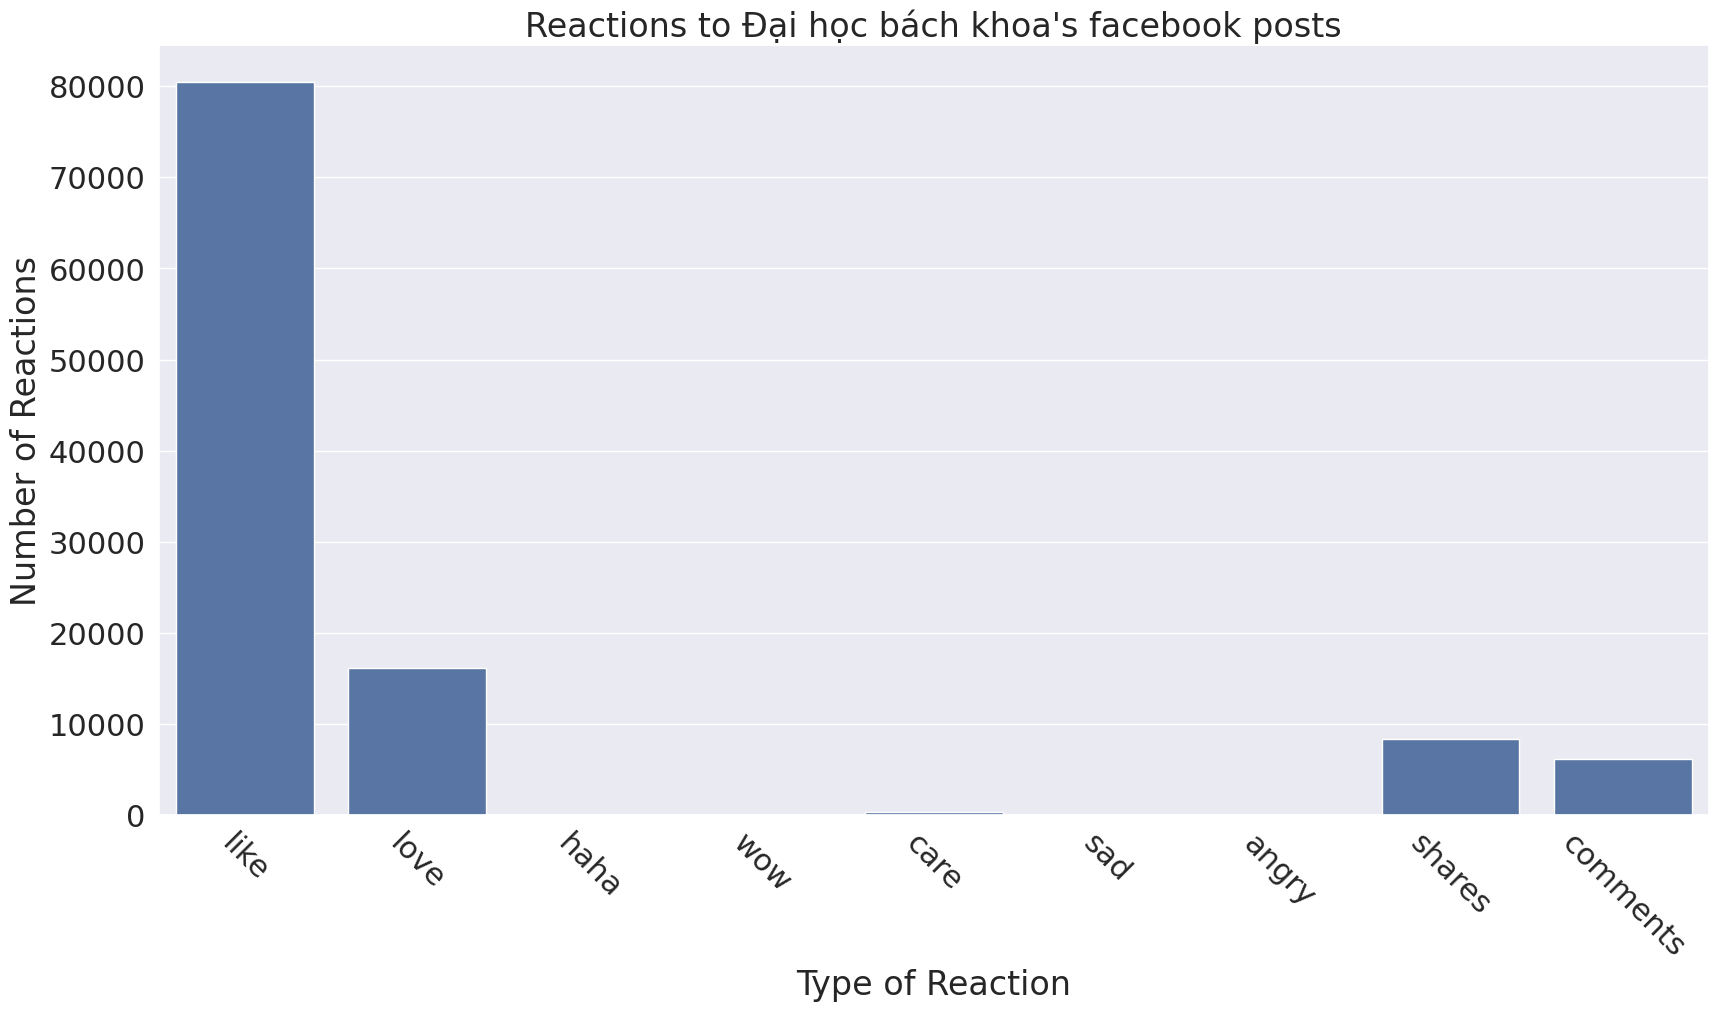

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's facebook posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Số lượng bài viết trong 3 tháng gần nhất

Text(0, 0.5, 'Số lượng bài viết')

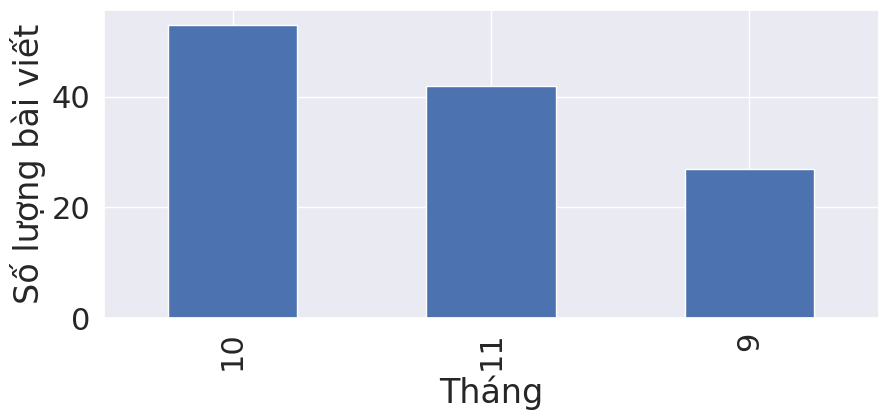

In [ ]:
m = cleaned_data['Month'].value_counts()
bp = m.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Thời điểm đăng bài 

Text(0, 0.5, 'Số bài đăng')

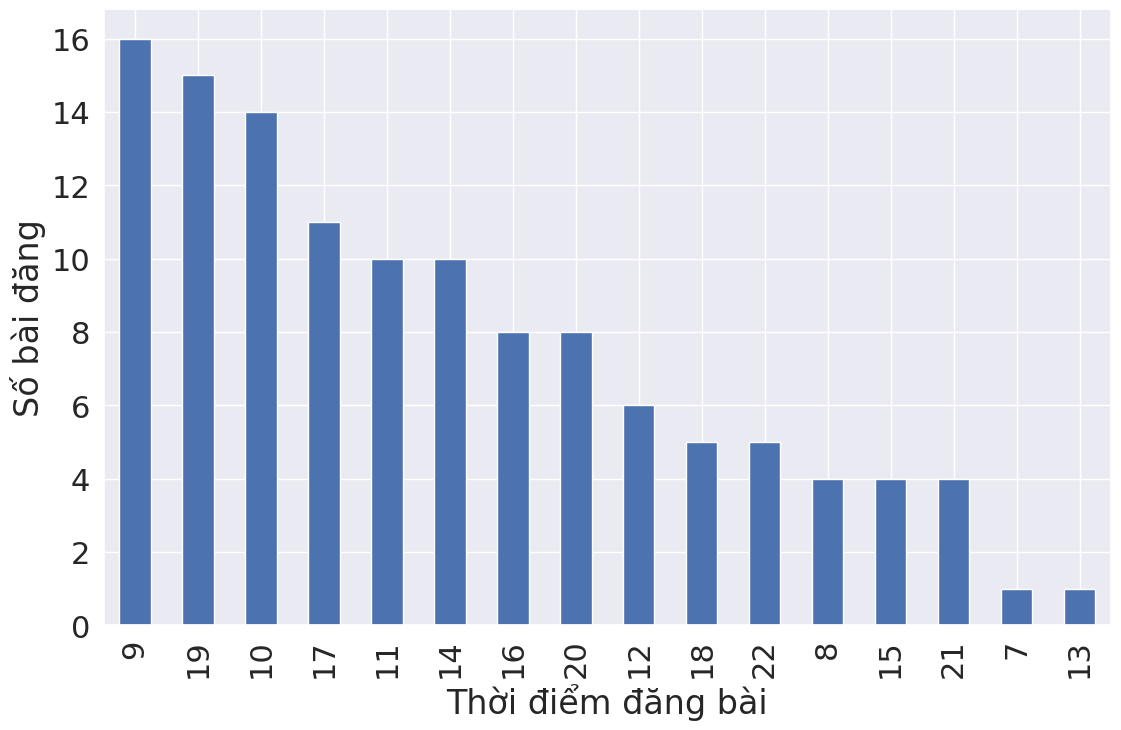

In [ ]:
h = cleaned_data['Hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

Nhận xét: số bài đăng chủ yếu vào lúc 19h tối và khoảng 9h sáng

<Axes: >

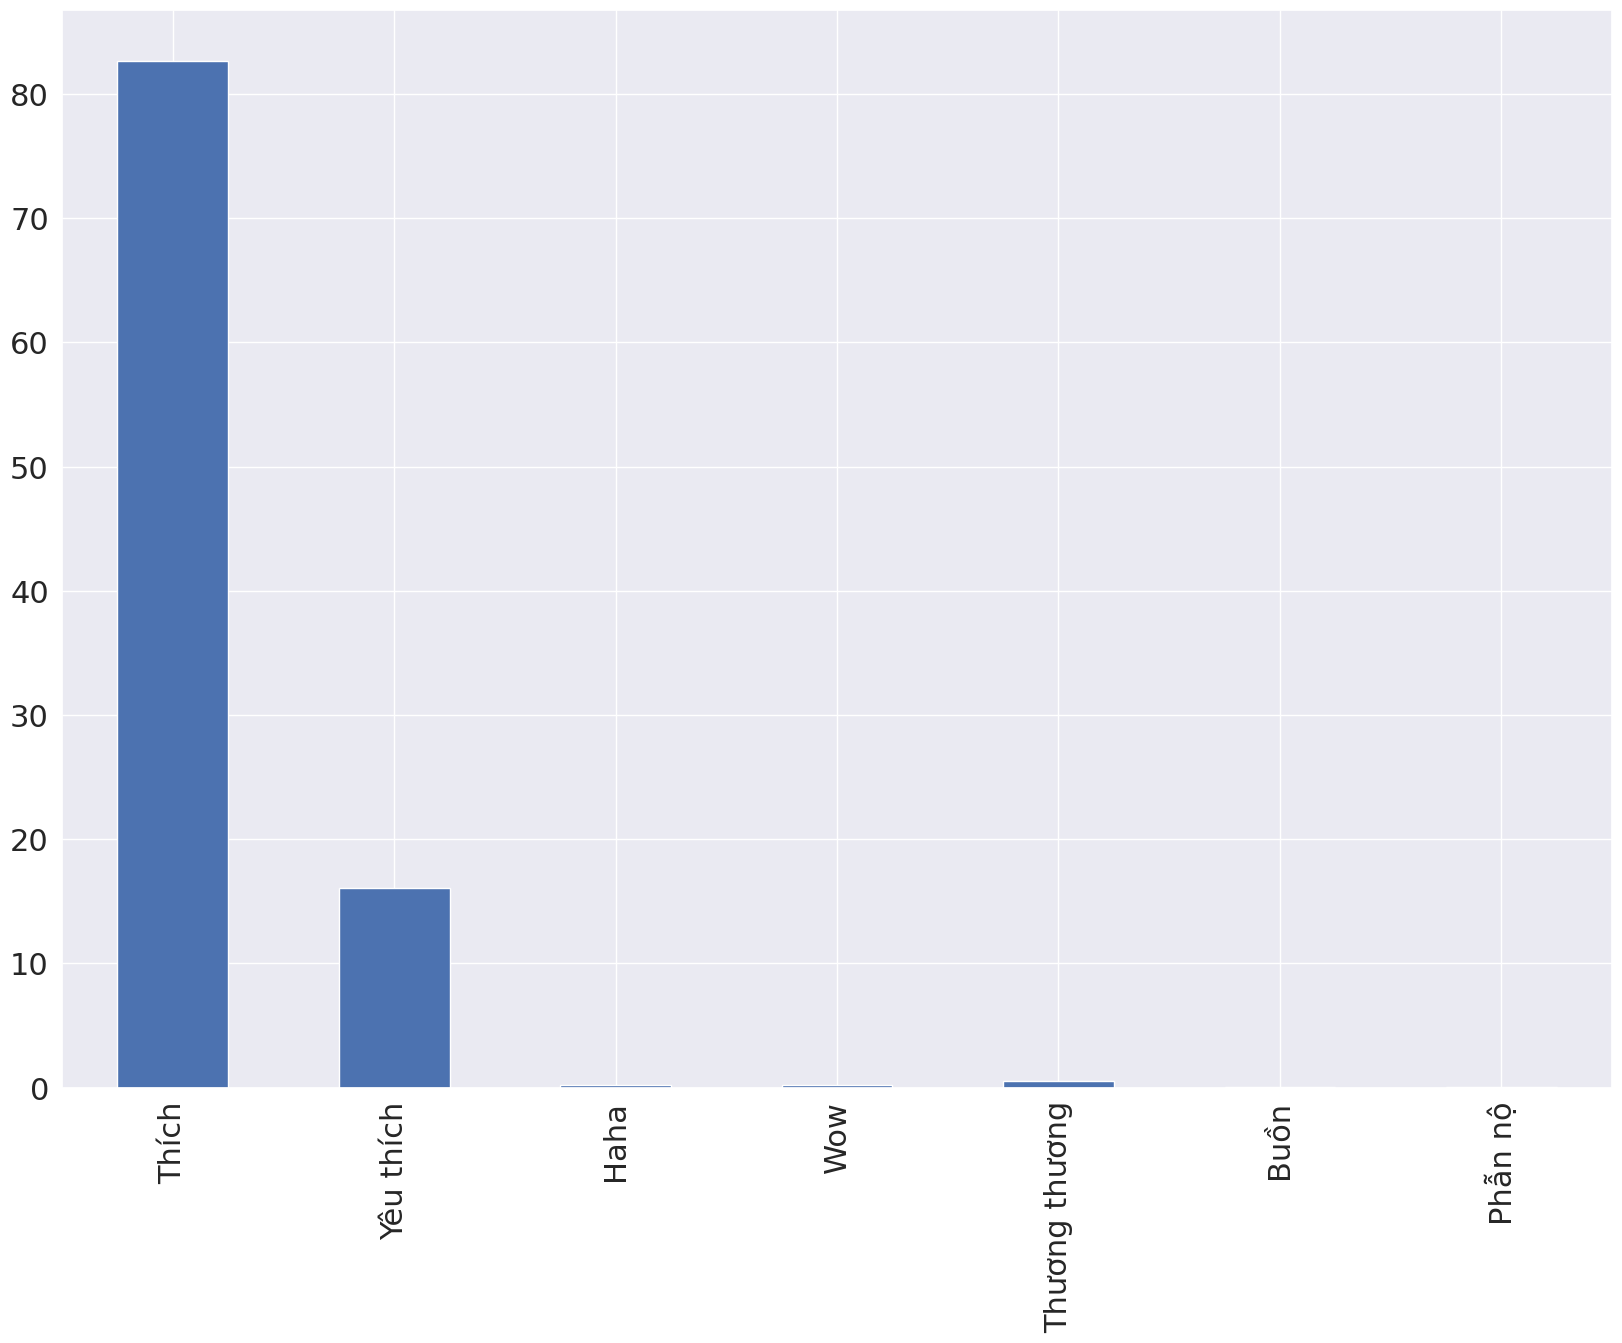

In [ ]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

10114 374.5925925925926


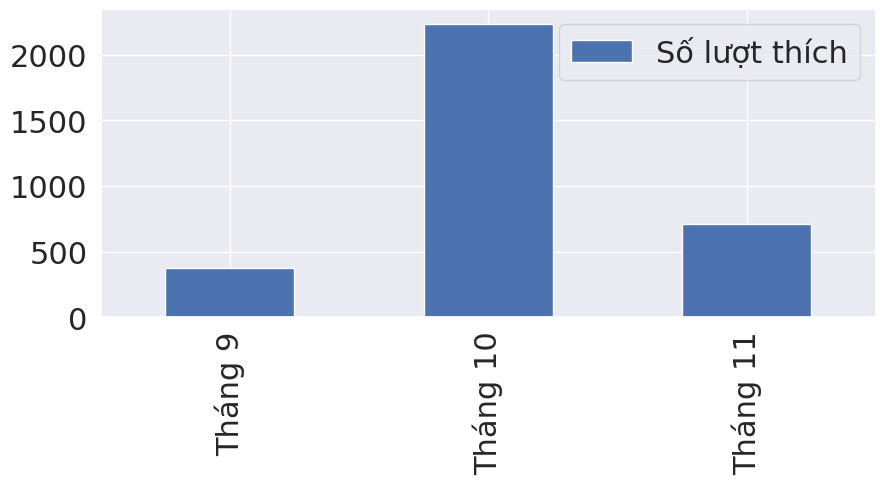

In [ ]:
likes_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)
likes_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)
likes_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)
likes_per_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)
likes_per_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)
likes_per_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)/len(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)
l = pd.DataFrame({'Số lượt thích': [likes_per_month_9,likes_per_month_10,likes_per_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))
print(str(likes_of_month_9)+ " " + str(likes_per_month_9))

Text(0, 0.5, 'reaction_count')

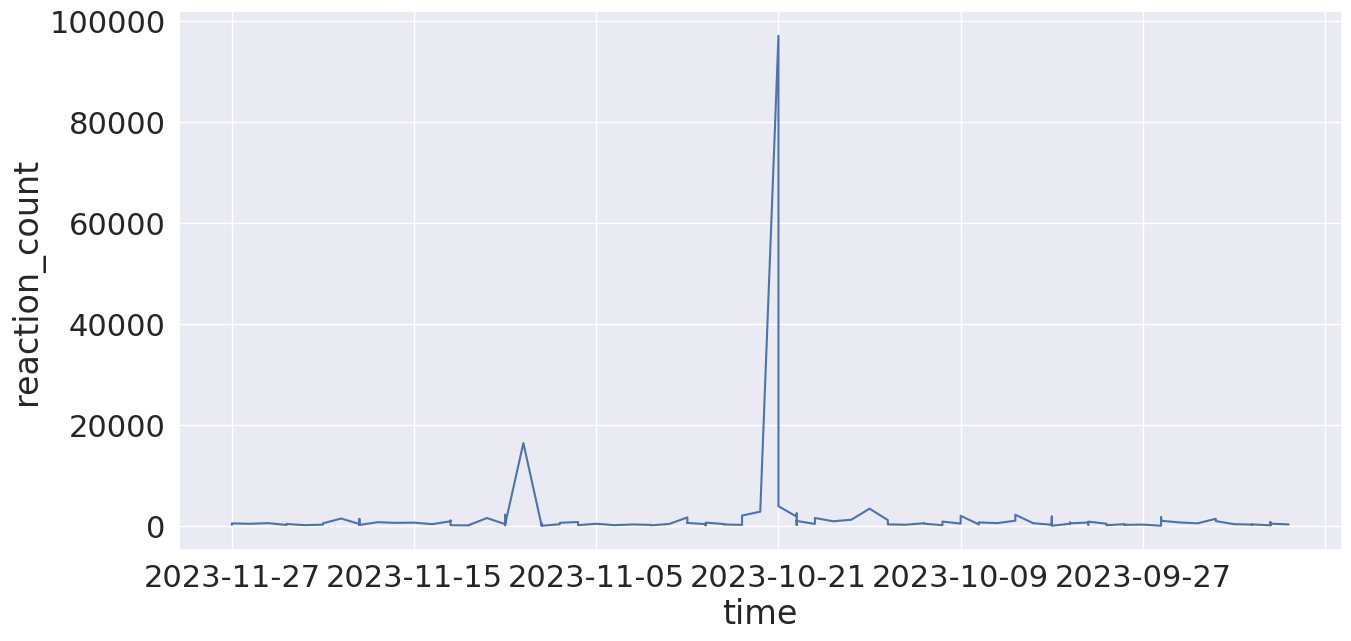

In [ ]:
x = cleaned_data['Date'].to_list()
y = cleaned_data['reaction_count'].to_list()
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(np.arange(0, 10 * 7, 10))
ax.set_xlabel('time')
ax.set_ylabel('reaction_count')

23817 449.37735849056605


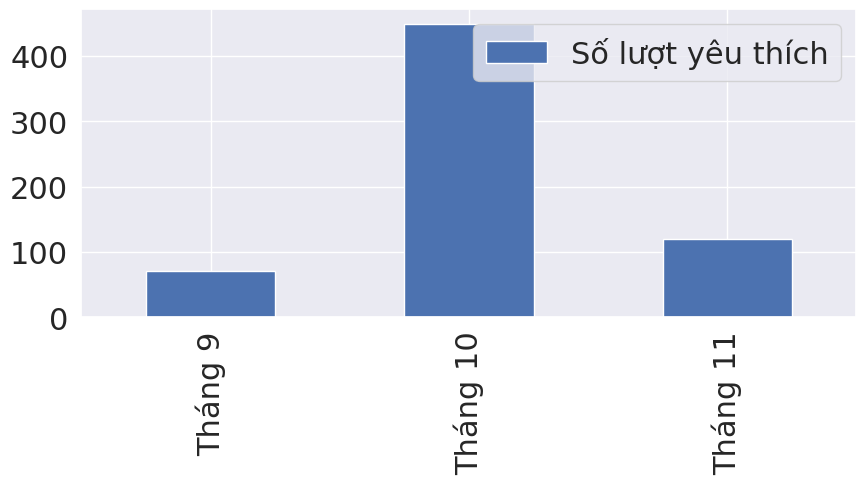

In [ ]:
loves_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)
loves_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)
loves_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)
loves_per_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)
loves_per_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)
loves_per_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)/len(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_per_month_9,loves_per_month_10,loves_per_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))
print(str(loves_of_month_10)+ " " + str(loves_per_month_10))

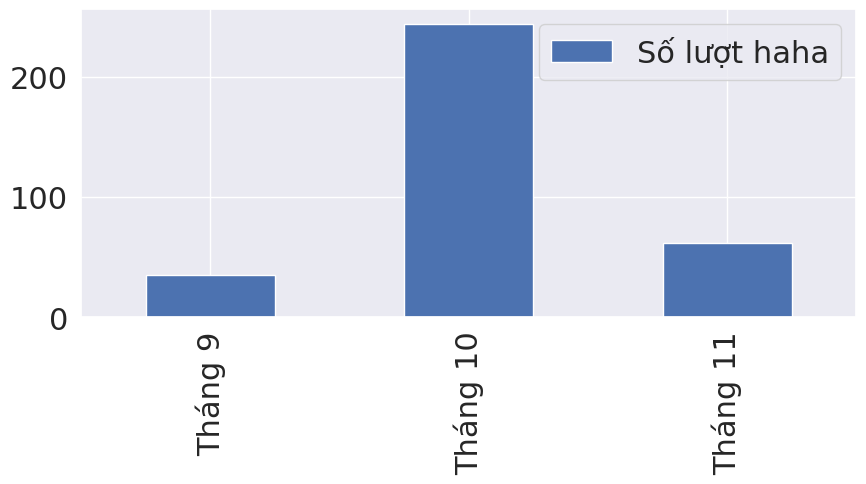

In [ ]:
haha_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Haha)
haha_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Haha)
haha_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

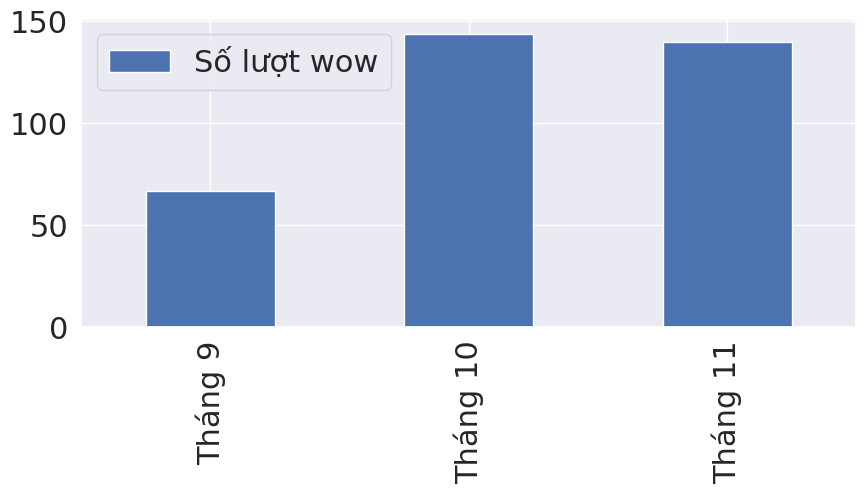

In [ ]:
wow_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Wow)
wow_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Wow)
wow_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Wow)
l = pd.DataFrame({'Số lượt wow': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

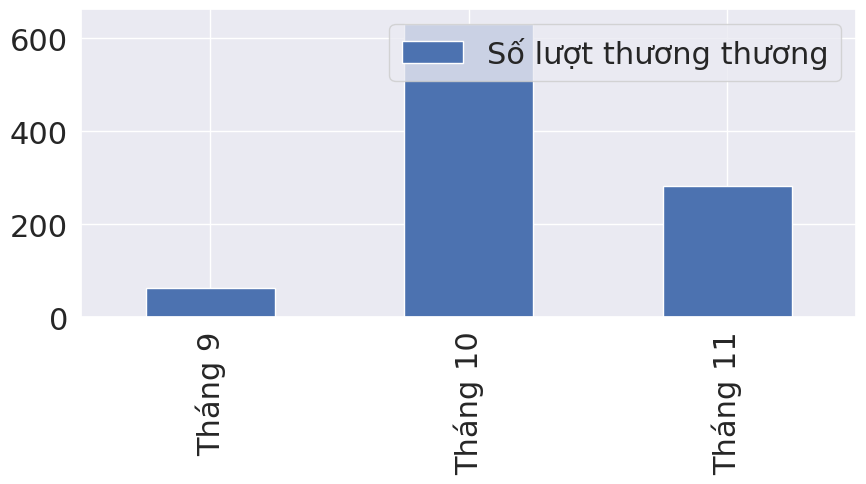

In [ ]:
tt_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thương_thương)
tt_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thương_thương)
tt_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

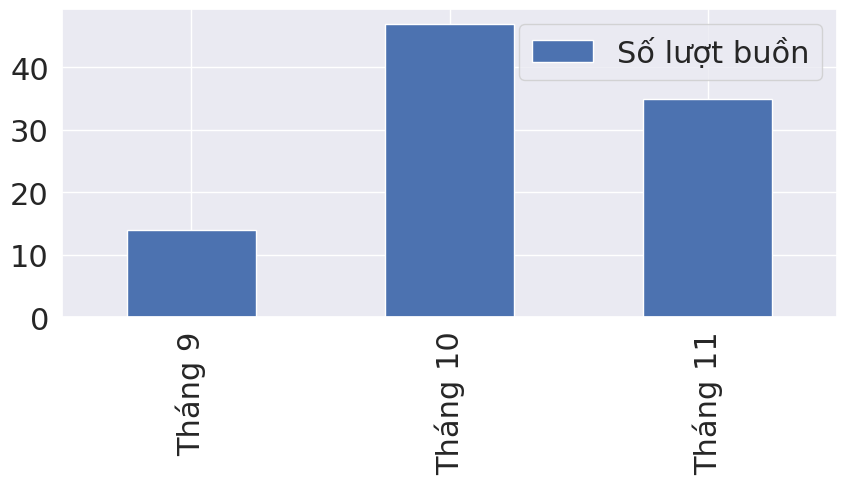

In [ ]:
buon_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Buồn)
buon_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Buồn)
buon_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

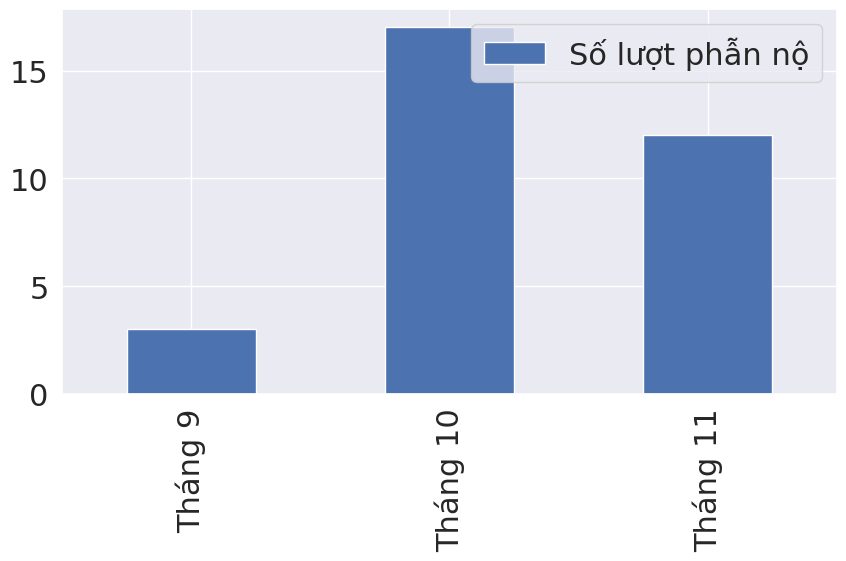

In [ ]:
phan_no_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Phẫn_nộ)
phan_no_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Phẫn_nộ)
phan_no_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

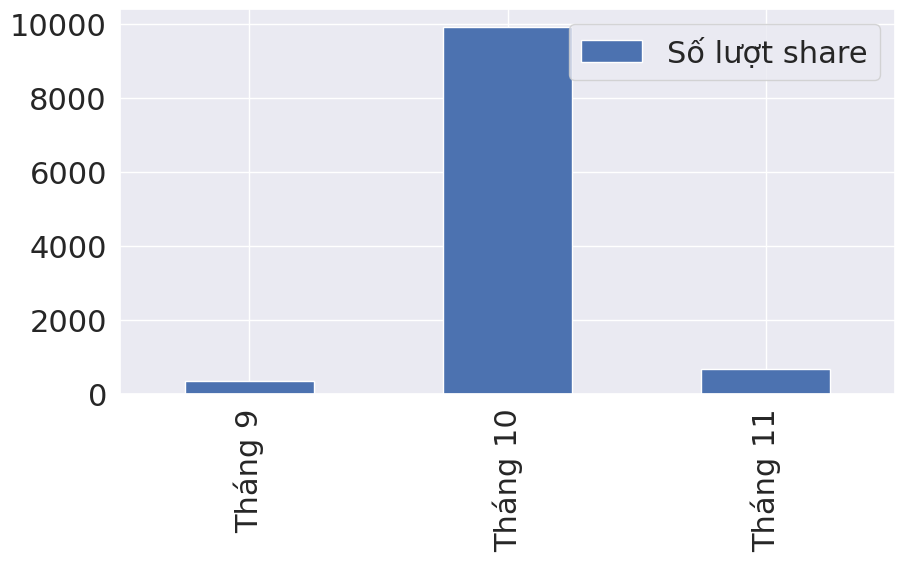

In [ ]:
shares_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].shares)
shares_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].shares)
shares_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

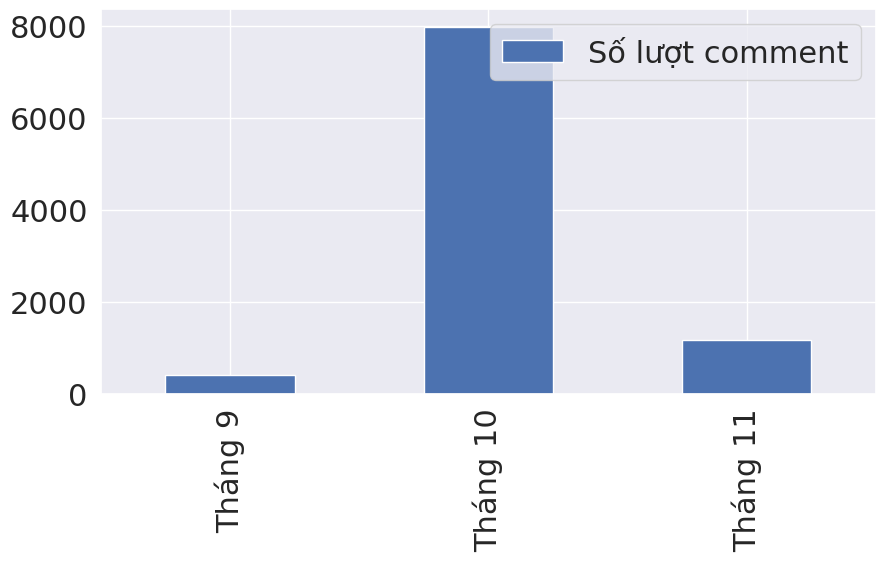

In [ ]:
cm_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].comments)
cm_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].comments)
cm_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

Nhận xét: Tháng 10 có số lượt tương tác của các reaction cao nhất. Tháng 10 cũng là tháng có nhiều lượt comment và lượt share nhất trong 3 tháng gần nhất 


Lượng tương tác theo từng tháng 


In [ ]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,10114,1918,67,35,62,14,3,364,419
Tháng_10,118619,23817,144,244,631,47,17,9906,7961
Tháng_11,29732,5007,140,62,281,35,12,679,1169


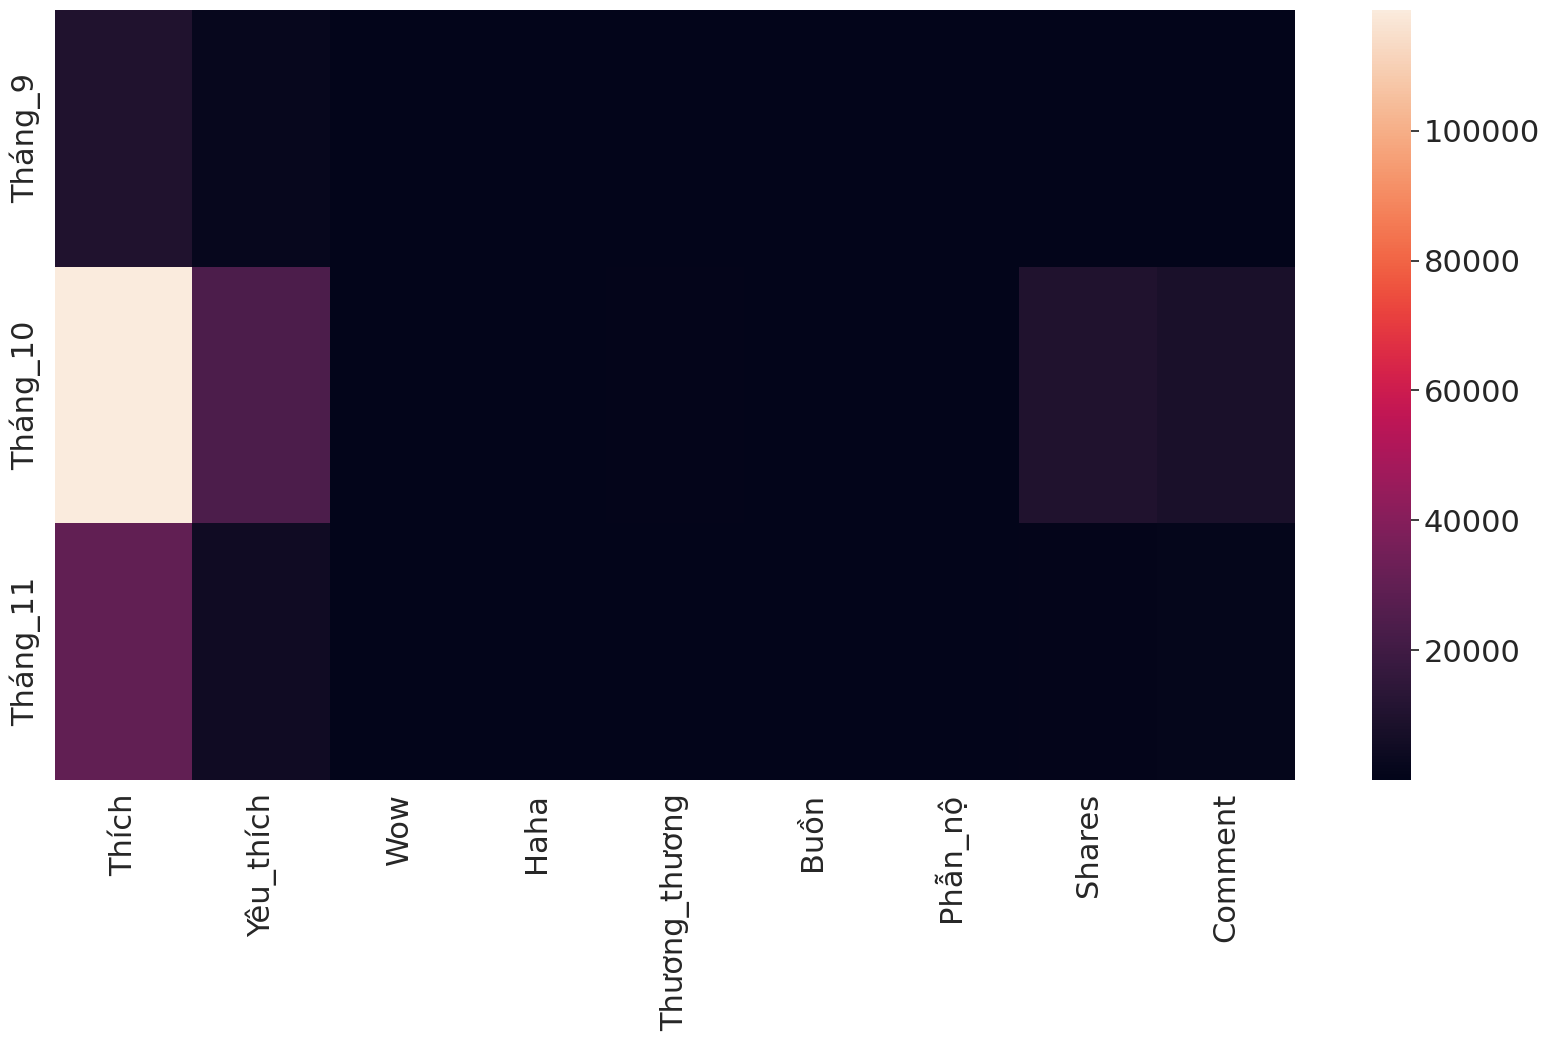

In [ ]:
display_sample = sns.heatmap(month_data)

<Axes: >

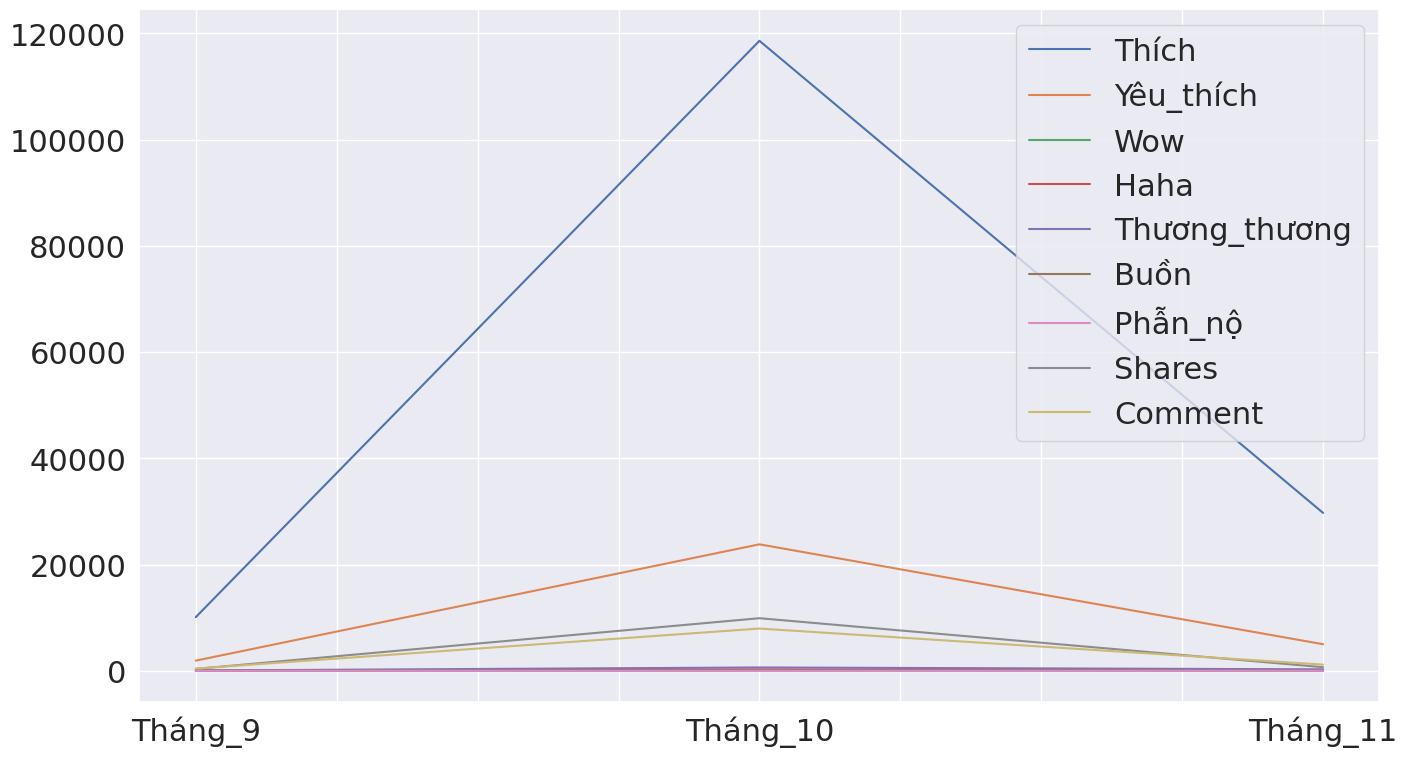

In [ ]:
month_data.plot(figsize=(16,9))

In [ ]:
cleaned_data['Date'].value_counts()

Date
2023-10-20    6
2023-09-19    4
2023-11-18    4
2023-11-08    4
2023-09-28    4
2023-11-10    4
2023-09-26    4
2023-11-13    4
2023-10-25    3
2023-10-03    3
2023-10-02    3
2023-09-30    3
2023-10-10    3
2023-10-28    3
2023-10-19    3
2023-10-13    3
2023-11-20    3
2023-09-20    3
2023-10-09    3
2023-10-21    2
2023-10-05    2
2023-10-08    2
2023-10-04    2
2023-10-23    2
2023-10-24    2
2023-11-27    2
2023-11-06    2
2023-10-30    2
2023-09-29    2
2023-11-07    2
2023-11-12    2
2023-09-22    2
2023-11-22    2
2023-10-11    2
2023-09-27    1
2023-09-24    1
2023-09-23    1
2023-10-06    1
2023-09-21    1
2023-10-22    1
2023-10-12    1
2023-11-11    1
2023-11-23    1
2023-11-21    1
2023-11-19    1
2023-11-17    1
2023-11-16    1
2023-11-15    1
2023-11-14    1
2023-11-09    1
2023-10-15    1
2023-11-05    1
2023-11-02    1
2023-11-01    1
2023-10-29    1
2023-11-24    1
2023-10-18    1
2023-10-17    1
2023-09-18    1
Name: count, dtype: int64

Có thể thấy ngày 20/10 là ngày phụ nữ việt nam và cũng là ngày page có số lượng bài đăng nhiều nhất  

Inside về người bình luận 

Các từ có tần xuất xuất hiện nhiều trong các bài viết 

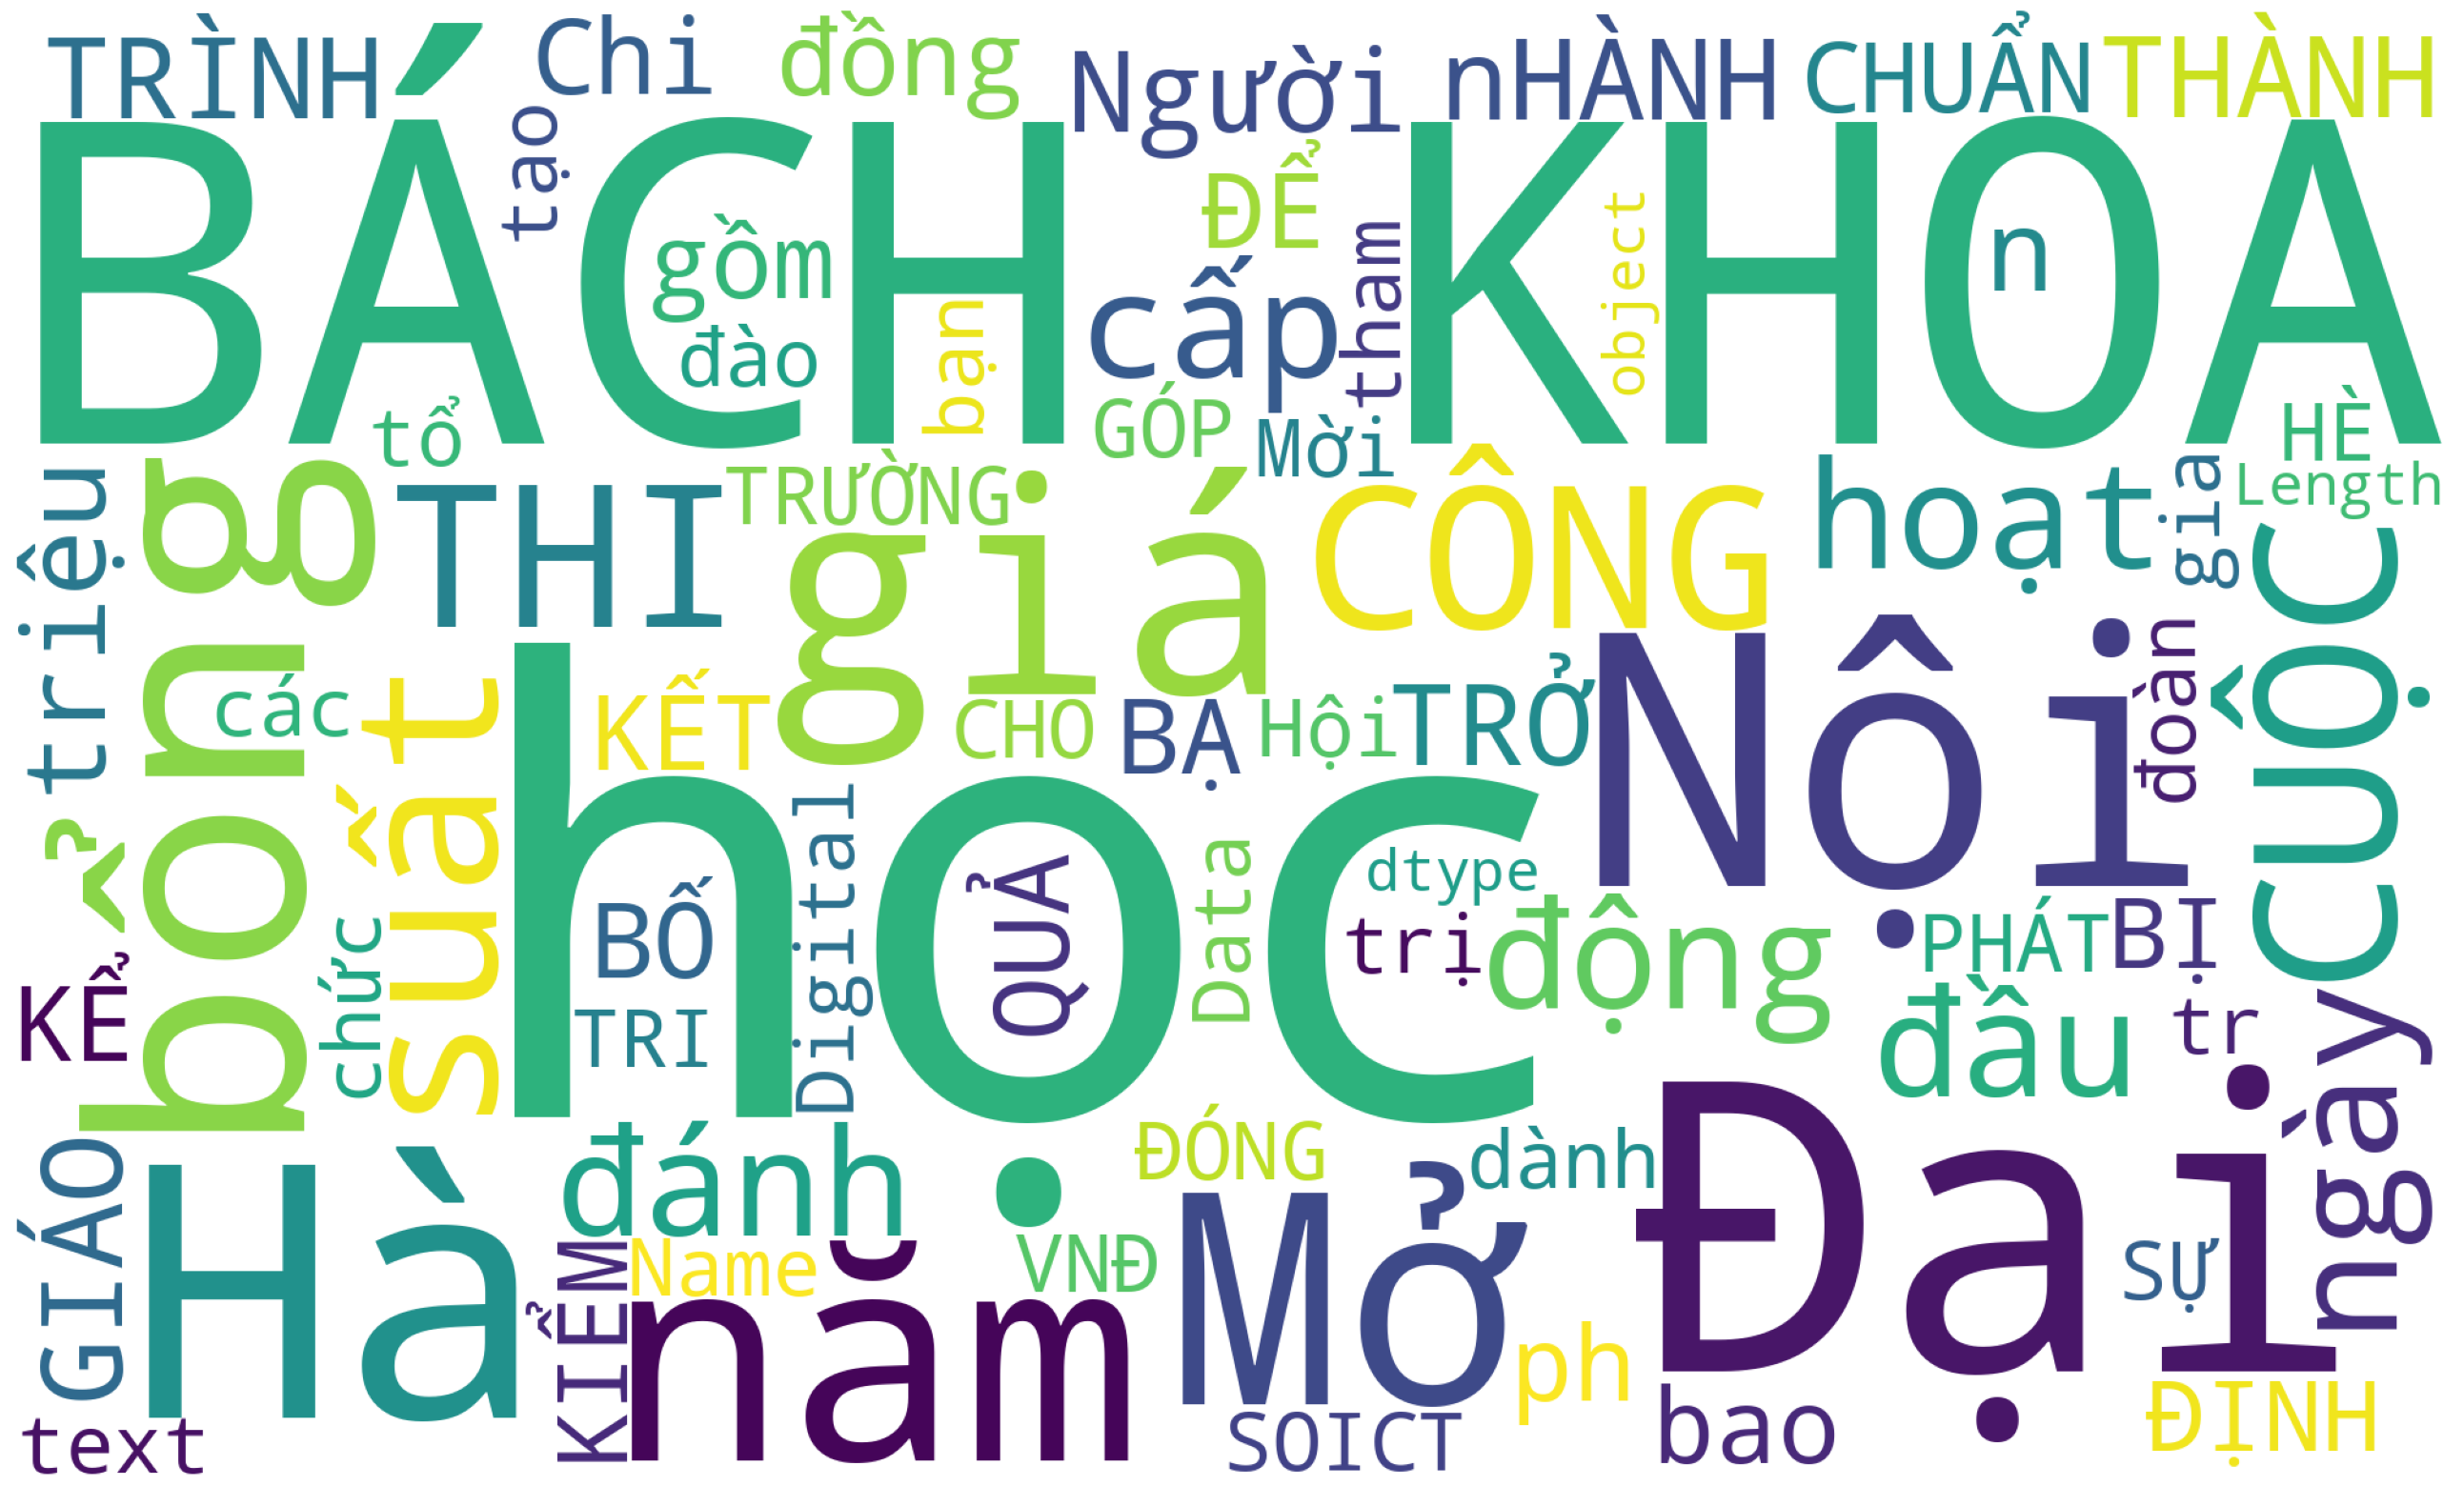

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = str(cleaned_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Mô hình và dự đoán 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
feature_cols = feature_cols = ['Thích','Yêu_thích','shares', 'comments']
X = cleaned_data[feature_cols].values
y = cleaned_data.reaction_count.values

In [ ]:
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122, 4)
(122,)
(109, 4)
(13, 4)
(109,)
(13,)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Bước 4: Dự đoán
y_pred = knn_model.predict(X_test)

# Bước 5: Đánh giá mô hình (ví dụ: sử dụng accuracy_score)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse


19157.30769230769

In [ ]:
y_pred

array([ 505,  719, 1131,  314,  268, 1384,   98,  195,  157, 1666, 1974,
        580,  461])

In [ ]:
y_test

array([ 517,  818, 1434,  327,  285, 1653,  104,  214,  160, 1823, 2181,
        658,  483])

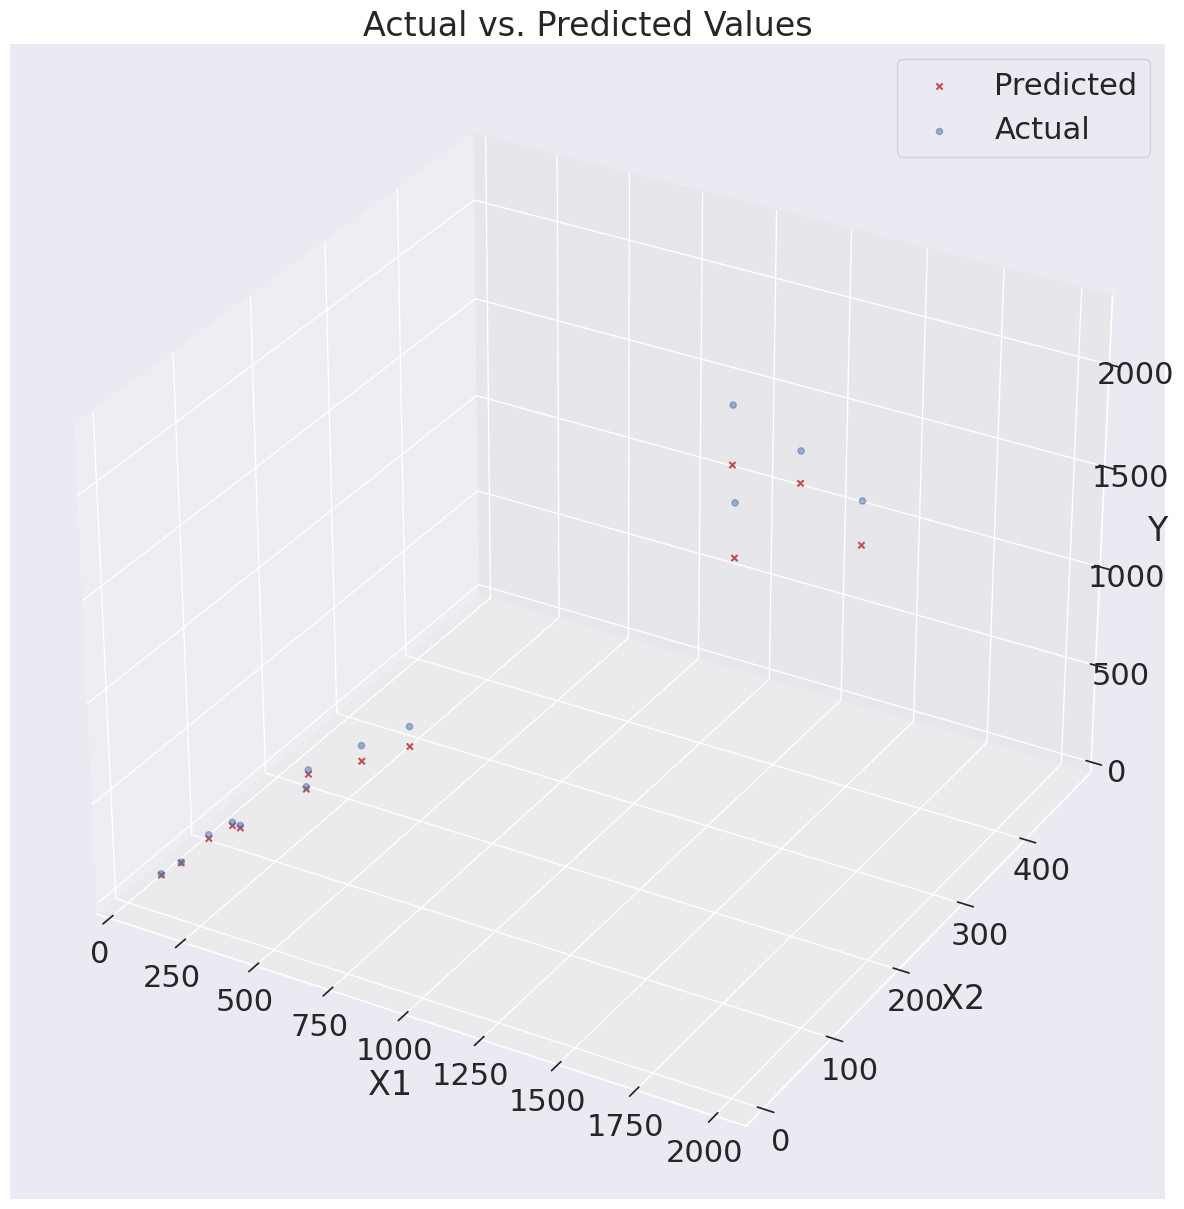

In [ ]:
# Let plot two of our features against our target variable:

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Predicted', alpha=1)

# Scatter plot for the original data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker='o', label='Actual', alpha=0.5)

ax.set_xlabel("\n" + 'X1')
ax.set_ylabel("\n" + 'X2')
ax.set_zlabel('Y')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()